## Projeto wAIne
### MVP 4 - Sprint: Qualidade de Software, Segurança e Sistemas Inteligentes

##### **Projeto de Avaliação da Qualidade de Vinhos Tintos**

Este projeto utiliza técnicas de machine learning para avaliar a qualidade de vinhos tintos com base em suas propriedades químicas. A partir de um [conjunto de dados](https://archive.ics.uci.edu/dataset/186/wine+quality) que inclui características como acidez, teor alcoólico, nível de açúcar, e outros componentes químicos, o modelo é treinado para prever se um vinho é de alta ou baixa qualidade. O objetivo é fornecer uma classificação automática que auxilia produtores e consumidores a identificar a qualidade do vinho de forma objetiva e eficiente.

Dataset utilizado: 'winequality-red.csv'

##### *Por: Raquel Wainfas*


---


##### **FONTE:**


>   This dataset is public available for research. The details are described in [Cortez et al., 2009].
> P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.
>   Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib




In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pickle

## Carga do Dataset

In [ ]:
# URL de importação do dataset
url = "https://raw.githubusercontent.com/raquelwainfas/MVP4-PUC-Rio/main/data/winequality-red.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=';')

# Mostra as primeiras linhas do dataset
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:11]
y = array[:,11]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: 0.584861 (0.043017)
KNN: 0.502768 (0.043741)
CART: 0.589505 (0.028259)
NB: 0.559787 (0.037451)
SVM: 0.494131 (0.042979)
Bagging: 0.671629 (0.021935)
RF: 0.679454 (0.027095)
ET: 0.675535 (0.019397)
Ada: 0.495755 (0.089910)
GB: 0.635642 (0.027686)
Voting: 0.594211 (0.037722)


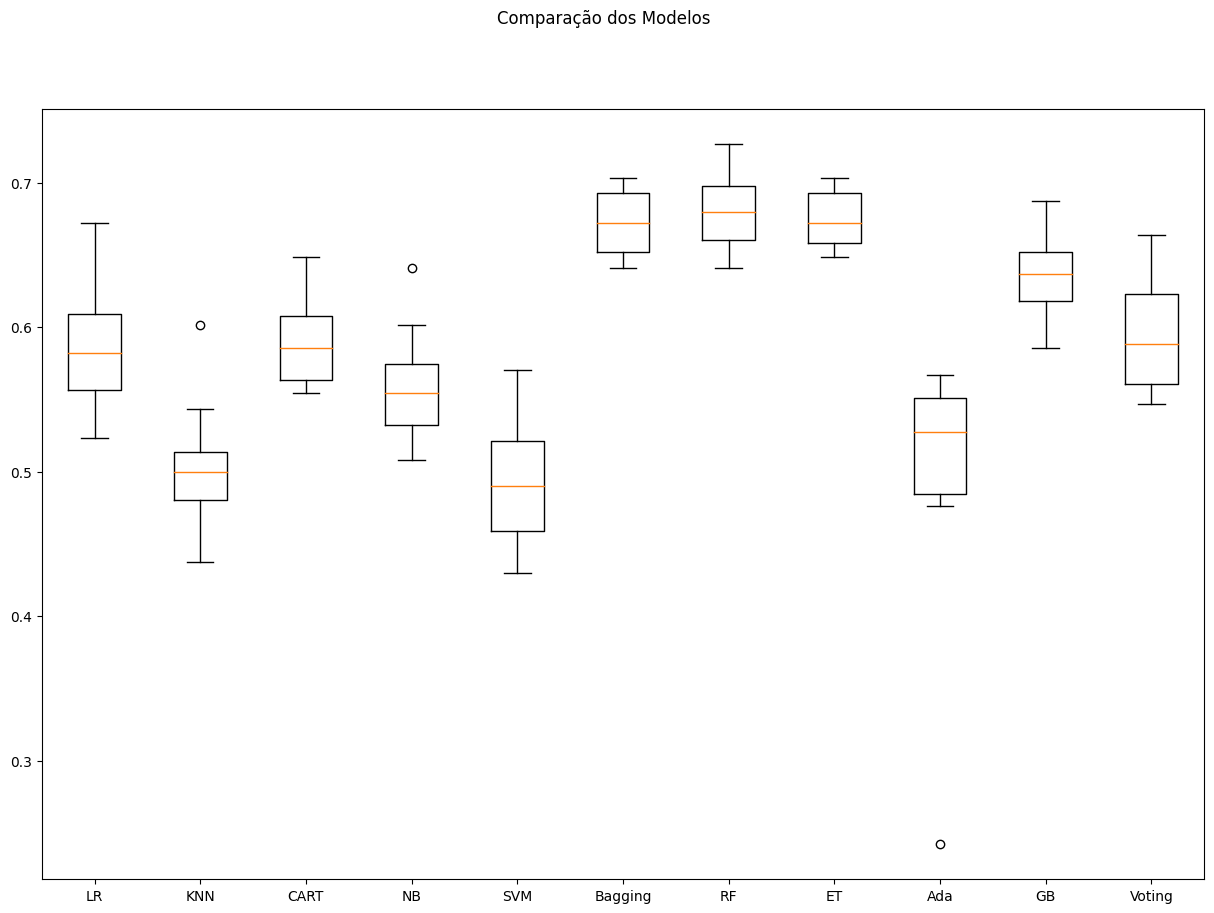

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Explicando o resultado da análise
Após a criação e avaliação de modelos de base é possível observar que, dentre os modelos, o melhor foi o Random Forest (RF), apresentando a maior média de desempenho: **0.679454**. Além disso, ele também apresentou um desvio padrão razoavelmente baixo (0.027095), o que indica uma variação relativamente pequena entre as iterações, sugerindo estabilidade do modelo.

### Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.585 (0.043)
KNN-orig: 0.503 (0.044)
CART-orig: 0.590 (0.028)
NB-orig: 0.560 (0.037)
SVM-orig: 0.494 (0.043)
Bag-orig: 0.672 (0.022)
RF-orig: 0.679 (0.027)
ET-orig: 0.676 (0.019)
Ada-orig: 0.496 (0.090)
GB-orig: 0.636 (0.028)
Vot-orig: 0.594 (0.038)
LR-padr: 0.584 (0.041)
KNN-padr: 0.586 (0.031)
CART-padr: 0.593 (0.025)
NB-padr: 0.557 (0.042)
SVM-padr: 0.617 (0.032)
Bag-padr: 0.682 (0.024)
RF-padr: 0.685 (0.033)
ET-padr: 0.683 (0.026)
Ada-padr: 0.496 (0.090)
GB-padr: 0.635 (0.028)
Vot-padr: 0.608 (0.036)
LR-norm: 0.580 (0.036)
KNN-norm: 0.578 (0.033)
CART-norm: 0.583 (0.030)
NB-norm: 0.557 (0.042)
SVM-norm: 0.613 (0.033)
Bag-norm: 0.689 (0.030)
RF-norm: 0.680 (0.032)
ET-norm: 0.673 (0.028)
Ada-norm: 0.495 (0.089)
GB-norm: 0.640 (0.025)
Vot-norm: 0.604 (0.029)


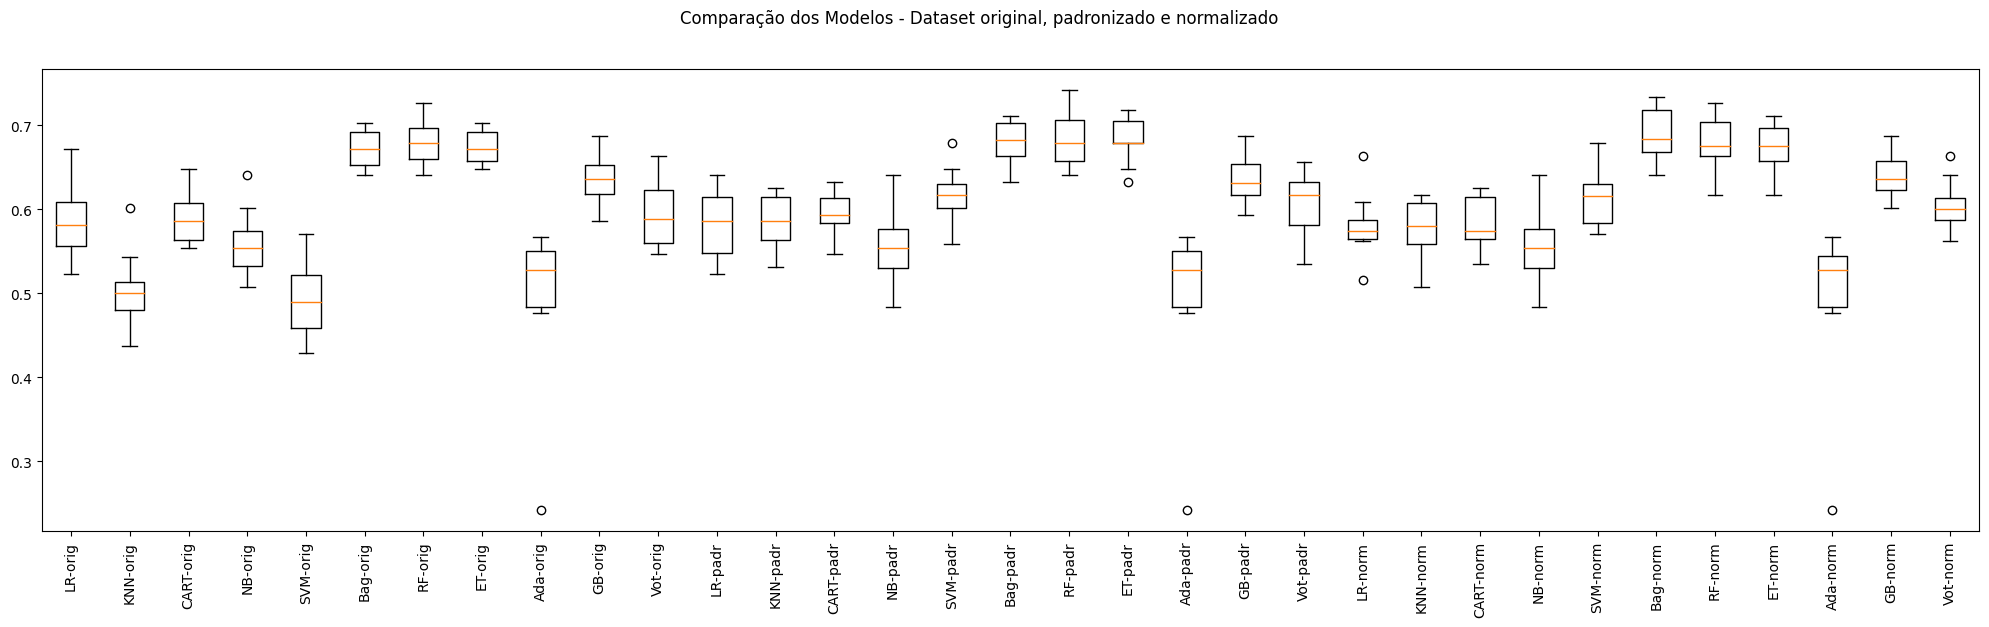

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Explicando o resultado da análise

Ao comparar os modelos em diferentes versões dos datasets (original, padronizado, normalizado), o modelo que apresenta a maior média de desempenho:

1. Melhor no dataset original:
Random Forest (RF): 0.679 (0.027)

2. Melhor no dataset padronizado:
Random Forest (RF): 0.685 (0.033)

3. Melhor no dataset normalizado:
Bagging: 0.689 (0.030)



### Otimização dos hiperparâmetros

In [ ]:
np.random.seed(7)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
        'SVM__kernel': ['rbf', 'linear']
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
    'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

    # Tempo de processamento: 2 horas

Modelo: LR-orig - Melhor: 0.577809 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.586382 usando {'LR__C': 1, 'LR__solver': 'saga'}
Modelo: LR-norm - Melhor: 0.584819 usando {'LR__C': 100, 'LR__solver': 'saga'}
Modelo: KNN-orig - Melhor: 0.565288 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Modelo: KNN-padr - Melhor: 0.606728 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Modelo: KNN-norm - Melhor: 0.608303 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Modelo: CART-orig - Melhor: 0.587969 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 5}
Modelo: CART-padr - Melhor: 0.585643 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 2}
Modelo: CART-norm - Melhor: 0.591088 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: NB-orig - Melhor: 0.548863 usando {'NB__var_smoothing': 1e-05}
Modelo: NB-padr - Melho

## Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes
# Melhor modelo
# RF-norm - Melhor: 0.783287 usando {'RF__max_depth': 10, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}

np.random.seed(7)

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train) # aplicação da normalização no conjunto de treino
model = RandomForestClassifier(n_estimators=50,
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=10,
                               min_samples_leaf=1)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.696875


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

RandomForestClassifier(max_depth=10, n_estimators=50)

# Salvando os arquivos

In [ ]:
# Salvando o modelo
model_filename = 'rf_redwine_classifier.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler
scaler_filename = 'minmax_scaler_redwine.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Salvando o pipeline
pipeline_filename = 'rf_redwine_pipeline.pkl'
with open(pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("X_test_dataset_redwine.csv", index=False)
y_test_df.to_csv("y_test_dataset_redwine.csv", index=False)

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe.
data = {'fixed acidity': [5.4, 6.7, 8.1, 8.5],
        'volatile acidity': [1.13, 0.87, 0.15, 0.28],
        'citric acid': [0, 0.05, 0.6, 0.56],
        'residual sugar': [1.9, 2.8, 1.2, 1.8],
        'chlorides': [0.341, 0.742, 0.124, 0.092],
        'free sulfur dioxide': [17, 29, 10, 35],
        'total sulfur dioxide': [56, 60, 80, 103],
        'density': [0.9968, 0.7785, 0.9968, 0.9969],
        'pH': [3, 4.5, 8, 3.3],
        'sulphates': [0.56, 1.1, 0.12, 0.75],
        'alcohol': [9.4, 10.1, 9.2, 10.5],
        }

atributos = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:11].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-1.67742050e+00  3.36406160e+00 -1.39147228e+00 -4.53218407e-01
   5.38852963e+00  1.07592090e-01  2.89864589e-01  2.82607677e-02
  -2.01578892e+00 -5.79206522e-01 -9.60246107e-01]
 [-9.30530923e-01  1.91157769e+00 -1.13471997e+00  1.85311731e-01
   1.39112721e+01  1.25516130e+00  4.11500458e-01 -1.15673729e+02
   7.70312824e+00  2.60749963e+00 -3.03175364e-01]
 [-1.26188300e-01 -2.11068544e+00  1.68955545e+00 -9.49852958e-01
   7.76471967e-01 -5.61823285e-01  1.01967980e+00  2.82607677e-02
   3.03806016e+01 -3.17578191e+00 -1.14798060e+00]
 [ 1.03623878e-01 -1.38444349e+00  1.48415360e+00 -5.24166200e-01
   9.63528645e-02  1.82894591e+00  1.71908605e+00  8.12621372e-02
  -7.20054859e-02  5.42041939e-01  7.22936317e-02]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[5. 5. 5. 7.]
